Dans ce notebook vous allez apprendre à faire un bilan des sources d'incertitude et à associer à chaque source une distribution statistique.

(sources)=
# Sources d'incertitudes et bilan.

## Faire un bilan des sources
Lorsqu'on réalise le mesurage d'un mesurande directe, plusieurs facteurs rendre notre mesure incertaine et faire que la reproduction de notre mesurage ne reproduira pas la même valeur mesurée. Si l'on ne fait qu'une seule mesure, il faut :
* identifier ces facteurs (ces __sources d'incertitudes__)
* associer à chaque _source d'incertitude_ une __distribution statistique__ et __un écart-type__.
* __combiner__ ces sources pour obtenir l'incertitude-type sur le mesurande étudié.

```{attention}
Attention, une source d'incertitude ne correspond pas à une grandeur d'influence mais à une contrainte __pratique__ qui augmente la dispersion des résultats de mesurage.
```

### Précaution importante
Citons le `Guide pour l'expression de l'incertitude de mesure` (référence dans le domaine) :

> Bien que ce Guide (ce notebook) fournisse un cadre pour l'estimation de l'incertitude, il ne peut remplacer ni la réflexion critique ni l'honnêteté intellectuelle ni la compétence professionnelle. L'évaluation de l'incertitude n'est jamais une tâche de routine ni une opération purement mathématique ; elle dépend de la connaissance détaillée de la nature du mesurande et du mesurage. La qualité et l'utilité de l'incertitude fournie pour le résultat d'un mesurage dépendent, en fin de compte, de la compréhension, de l'analyse critique et de l'intégrité de ceux qui contribuent à son évaluation. `(GUM p.8 3.4.8)`

et :

> L'utilisation correcte de l'ensemble des informations disponibles pour une évaluation de type B de l'incertitude-type fait appel à la perspicacité fondée sur l'expérience et les connaissances générales, et c'est une compétence qui \[peut\]\(doit\) s'apprendre par la pratique. `(GUM p.11 4.3.2)`

```{danger}
En clair, IL FAUT REFLECHIR ET NE PAS APPLIQUER DES RECETTES DE CUISINE SANS LES COMPRENDRE.
```

### Sources usuelles
Bien qu'il faille réfléchir aux sources d'incertitudes dans chaque cas, nous présentons ici quelques sources qu'on rencontre souvent et la manière d'associer à ces ressources une distribution statistique.

On rappelle que ce sont des exemples qui ne doivent pas être transposés sans réflexion à toutes les expériences en TP.

#### Fluctuation ou limitation de la précision de la mesure.

##### Généralités
C'est la principale source d'incertitude que nous allons rencontré. En effet, généralement lors d'une mesure, les limitations de l'instrument, le flou (en optique) et la variation de la grandeur mesurée fera qu'on ne __pourra pas dire mieux que : le résultat de mesure se trouve dans tel intervalle.__

##### Exemples
```{admonition} Exemple : la mesure à la règle d'une position (ici les traits noir et vert)
:class: tip

![Mesure avec une règle](./images/mesure_regle.jpg)

* Pour le trait noir (fin), la détermination de sa position est limitée par les graduations de la règle.
    * On peut dire que la mesure est entre $[3.7 cm; 3.8cm]$.
    * On choisira donc une distribution uniforme (toutes les valeurs 3.7 et 3.8 cm semblent possible de manière égale) d'intervale $[3.7 cm; 3.8cm]$.
    * L'incertitude-type sera $1 / \sqrt{12} = 0.29 cm$
* Pour le trait vert (épais), on n'a plus un trait entre deux valeurs (cas d'une image un peu floue en optique).
    * On peut simplement dire que la mesure est entre $[4.4 cm; 4.7cm]$ (on ne limite par contre aux graduations car l'instrument ne permet pas mieux).
    * On choisira donc une distribution uniforme (toutes les valeurs 4.4 et 4.7 cm semblent possible de manière égale) d'intervale $[4.4 cm; 4.7cm]$.
    * L'incertitude-type sera $3 / \sqrt{12} = 0.87 cm$
```

```{admonition} Exemple : La fluctuation d'un appareil
:class: tip
On considère la mesure d'une tension $U$ au moyen d'un multimètre numérique. Mais l'affichage fluctue et on observe que la mesure varie entre deux valeurs extrêmes : 2.43 V et 2.48 V.

On va donc choisire une distribution uniforme d'intervale $[2.43 V; 2.48 V]$. 

L'incertitude-type sera $0.05 / \sqrt{12} = 0.014 V$ (cf. suite).
```

```{admonition} Remarques
:class: note
* On fait souvent le choix d'une distribution uniforme lorsqu'on est confronté à un intervalle de valeur de lecture acceptable. Comme on le verra par la suite il peut être utile de calculer l'écart-type (donc l'incertitude-type) associée à une telle distribution. 
    * _On admettra que l'écart-type d'une telle distribution uniforme de largeur $l = (b-a)$ est $\frac{l}{\sqrt{12}}$ (cf. [simulation](dist_unif))._
* Le choix d'une distribution uniforme est fréquent mais pas obligatoire si vous le considérez comme innaproprié. Par exemple, dans le cas du trait rouge (photo de la règle) qui est très fin et situé presque sur 3.5mm, on pourra choisir une distribution gaussienne centrée en 3.5mm et d'écart-type 1mm (car il est clairement entre 3.45 et 3.55 mm). __Le choix d'une distribution n'est pas automatique mais une réflexion (rapide tout de même) basée sur le bon sens.__ Il n'est par contre pas nécessaire de connaître un grand catalogue de distribution, les ditributions _uniformes et normales_ suffiront dans le cadre du programme.
```

#### Données d'un constructeur
On est souvent amené à utiliser les données d'un constructeur pour estimer une incertitude.

##### Exemples
````{admonition} Valeur d'un composant
:class: tip
On utilise une lentille mince en optique de distance focale $f' = 10 cm$, le constructeur nous dit que sa distance focale est connue à 10%.

__Sans plus d'informations__, on considèrera qu'il s'agit de l'incertitude-type associée à une distribution gaussienne . On va donc associer à la valeur f' une incertitude de distribution uniforme centrée en $10 cm$ et d'écart-type $\frac{10}{100} \times 10 = 1 cm$.

```{margin}
Note : l'hypothèse d'une distribution normale ne sera pas plus fausse vu le manque d'information !
```
````

```{admonition} Variabilité d'un instrument de mesure.
:class: tip
Le multimètre numérique utilisé précédemment pour la mesure de U (dont la valeur mesurée est donc $\frac{2.43 + 2.48}{2} = 2.455 V$) est sujet à une dispersion des valeurs données, même si l'affichage est stable. Ainsi, le constructeur nous dit que la valeur mesurée, sur le calibre utilisé, possède une incertitude de 2%.</font>

A nouveau peu d'information, on va à nouveau considérer une distribution uniforme centrée sur 2.455 V et d'écart-type $\frac{2}{100} \times 2.455 = 0.049 V$.
```

```{admonition} Remarques
:class: note

* Les constructeurs ne fournissent souvent que peu d'informations (un simple pourcentage). On doit donc en général choisir la distribution statistique associée (on n'est même pas sûr que la grandeur donnée soit une incertitude-type). Il n'est pas nécessaire de passer beaucoup de temps sur la question puisque la manipulation ne nous donnera aucune donnée supplémentaire pour décider. 
* Le cas de la lentille et du multimètre sont tout de même différents.
  * _Dans le cas du multimètre_, il s'agit de la fidélité de l'instrument de mesure : elle représente le fait qu'en reprenant plusieurs fois la même mesure avec le même appareil, on risque d'obtenir des valeurs différentes (même si la mesure est stable). On ne peut rien faire dans la manipulation sinon tenir compte de cette dispersion annoncée.
  * _Dans le cas de la lentille_, il s'agit de la dispersion des valeurs de focale dans un lot de lentilles fabriquées par le constructeur. Mais la lentille que vous utilisez possède une valeur de focale qui ne varie pas (ou peu). On utilise alors la dispersion des valeur de 10% parce qu'on est pas sûr de la valeur de f'. Ce n'est donc pas une vraie dispersion __lors de la mesure__ mais plutôt l'utilisation du fait que f' possède une gamme de valeurs possibles. En pratique, _si on avait le temps_, il serait sage de réaliser une manipulation permettant de mesurer la distance focale f' de __notre__ lentille (car nous sommes capables d'améliorer une incertitude de 10% !!). Si on n'a pas le temps, on prend l'étude du constructeur sur son processus de fabrication (les 10%) à la place.
```

#### Remarques générales
* On remarquera que la première source d'incertitude (plage de valeur à la place d'une valeur précise) nécessite __une réflexion propre à la manipulation__ pour l'estimer. Par exemple, dans le cas des fluctuations du multimètre, c'est pendant la mesure qu'on peut déterminer les valeurs minimales et maximales affichées pour $U$. Après c'est trop tard. Ce qui signifie que __le bilan des sources d'incertitude et leur estimation (écart-type, choix de la distribution associée)__ est l'objet d'une réflexion constante DURANT la manipulation. C'est un réflexe à avoir...
* Il n'est pas nécessaire de passer trop de temps sur le choix de la distribution à notre niveau.
* Ce sont des exemples qui ne sont pas forcément exhaustifs.

## Combiner plusieurs sources d'incertitude
Il arrive fréquemment qu'il existe plusieurs sources d'incertitudes pour un même mesurande. 

```{admonition} Exemple
:class: tip
C'est le cas de la mesure de la tension U : il y a une incertitude sur la lecture de la valeur et une incertitude liée à l'instrument.
```

Pour estimer l'incertitude-type totale sur le mesurande $U$, on dispose de deux méthodes :
1. On simule les deux processus aléatoire de chaque sources d'incertitude grâce aux distributions choisie un grand nombre de fois et on simule ainsi la variabilité du mesurande. On pourra alors obtenir sa distribution statistique ainsi que son incertitude-type (comme l'écart-type de cette distribution). On parle de __simulation de Monte-Carlo__.
1. On réalise une __propagation des variances__ (application des propriétés de la variance mathématique sur des lois statistiques) ce qui nous donne l'incertitude-type (mais pas la distribution).

### Simulation de Monte-Carlo.

#### Principe
Le principe est le suivant :
1. Pour chaque sources d'incertitude  __indépendante__, on a choisi une distribution statistique. On peut donc simuler la variabilité causée par chaque source en réalisant un tirage aléatoire de N échantillons suivant la loi statistique choisie.
2. On somme alors les tirages ce qui nous donne la valeur simulée du mesurande soumise à la variabilité de TOUTES les sources.
3. On peut alors tracer l'histogramme des valeurs pour observer la distribution obtenus et calculer l'écart-type associé pour estimer l'incertitude-type totale.

```{important}
Il y a juste une petite __subtilité__. En effet, si l'on centre la distribution des sources sur le résultat de mesurage (2.455 V dans l'exemple de U), on va en sommant obtenir un mesurande qui n'est pas "centré" sur le résultat de mesurage ! (Dans le cas de U où il y a deux sources, on sera centré sur $2.455 * 2 = 4.91$) : c'est un problème. L'_astuce_ consiste à centrer toutes nos lois de distribution autour de 0 ! On pourra ensuite ajouter à l'ensemble la valeur mesurée.
```

#### Exemple
> <font color="blue">Exemple : Dans le cas de la tension U, la procédure sera :</font>
> 1. On simule N échantillons d'une distribution uniforme entre $-0.014 V$ et $0.014 V$ (simulation de l'incertitude liée à la lecture de la valeur).
> 2. On simule N échantillons d'une distribution gaussienne d'écart-type $0.049 V$ centrée en 0 (simulation de l'incertitude liée à la variabilité de l'appareil de mesure).
> 3. On somme les échantillons des deux distributions et on ajoute la valeur mesurée (ici 2.455). On obtient ainsi N échantillons simulés de $U$.
> 4. On étudie la distribution statistique ainsi obtenue et on déterminer l'incertitude-type sur U grâce à l'écart-type des N tirages.

> Lire et comprendre le code ci-dessous de manière à pouvoir le refaire et l'adapter à d'autre cas. Observer ensuite ce qu'on obtient dans le cas de l'étude de $U$.

On a donc : U = 2.455 +/- 0.051


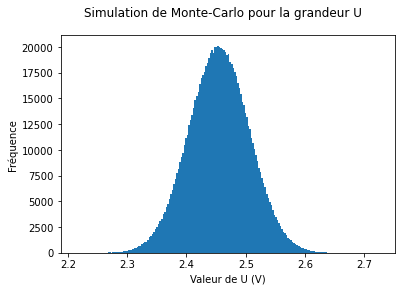

In [1]:
"""Importation des bibliothèques

On commence par importer les bibliothèques utiles matplotlib.pyplot, numpy et numpy.random.
"""
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as rd

"""Simulation des composantes

On simule chaque composante
"""
N = 1000000  # Nombre d'échantillons
Uval = 2.455  # Résultat de mesurage pour Uval
llec = 0.025  # Demie-largeur de la distribution uniforme associée à la lecture de la valeur
lins = 0.049  # Ecart-type de la distribution gaussienne associée à la fidélité de l'instrument
echlec = rd.uniform(-llec, llec, N)  # La fonction uniform génèrera un vecteur de taille N
echins = rd.normal(0, lins, N)

"""
On simule U et on calcule son incertitude-type
"""
echU = echlec + echins + Uval  # On simule U en ajoutant le résultat de mesurage
uU = np.std(echU, ddof=1)  # std est une fonction de numpy. L'option ddof=1 permet de diviser par N-1 et non par N ce qui est plus précis.
print("On a donc : U = {:.3f} +/- {:.3f}".format(Uval, uU))

"""
On réalise le tracé de la distribution des U simulés.
"""
f, ax = plt.subplots()  # Création de la figure f est des axes ax dans la figure f
f.suptitle("Simulation de Monte-Carlo pour la grandeur U")
ax.set_xlabel("Valeur de U (V)")
ax.set_ylabel("Fréquence")
ax.hist(echU, bins='rice')

plt.show()

```{note}
On remarquera que l'allure finale ressemble beaucoup à une distribution gaussienne malgé la présence de la distribution uniforme. C'est fréquent.
```

### Propagation des variances

Cette méthode sera présentée plus tard.